# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de confusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification des nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Configuration du drive

In [ ]:
import gdown

file_id = "1s38onIYiu8uJlIFcqJVW7mBWq-tAPBYi"  # Remplacer par ton ID réel
gdown.download(f"https://drive.google.com/uc?id={file_id}", "TP1.zip", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1s38onIYiu8uJlIFcqJVW7mBWq-tAPBYi
To: /content/TP1.zip
100%|██████████| 1.20M/1.20M [00:00<00:00, 11.9MB/s]


'TP1.zip'

# Verification si le fichier zip existe ou pas

In [ ]:
!file TP1.zip

TP1.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


# Unzip The file

In [ ]:
import zipfile

# Extraire le ZIP
with zipfile.ZipFile("/content/TP1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/TP1")

# Afficher le contenu
!ls /content/TP1


 data.csv   labels.csv	 __MACOSX  'TP 1.ipynb'


# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('/content/TP1/data.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("/content/TP1/data.csv",nrows=5000)

(5000, 400)


In [ ]:
# étiquettes
Y = np.genfromtxt('/content/TP1/labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

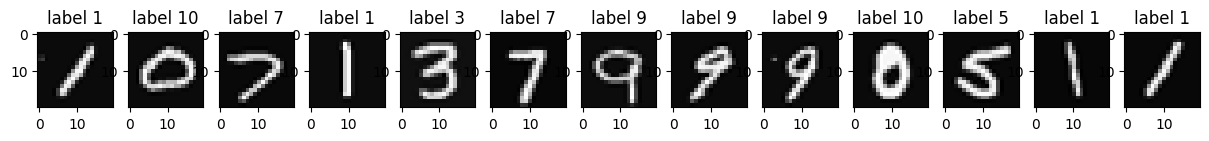

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

*  Definition de chemin des donnees

In [ ]:
data = pd.read_csv('/content/TP1/data.csv')
labels = pd.read_csv('/content/TP1/labels.csv')

*  Entraînement et Prédiction du modele

In [ ]:
labels = labels.values.ravel()  # Convertit un DataFrame colonne en array 1D

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
# Entraînement du modèle
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)


Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [ ]:

def confusion_matrix_manual(y_true, y_pred):

    # Détecter automatiquement toutes les classes présentes
    labels = np.unique(np.concatenate((y_true, y_pred)))

    # Initialiser une matrice carrée de taille (n_classes, n_classes)
    n_classes = len(labels)
    print(n_classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)

    # Dictionnaire pour mapper chaque label à un indice
    label_to_index = {label: i for i, label in enumerate(labels)}

    # Remplir la matrice de confusion
    for true_label, pred_label in zip(y_true, y_pred):
        true_index = label_to_index[true_label]
        pred_index = label_to_index[pred_label]
        cm[true_index, pred_index] += 1

    return cm, labels

# Calcul de la matrice de confusion
cm, labels = confusion_matrix_manual(y_test, y_pred)

# Affichage de la matrice
print("Matrice de confusion manuelle :")
print(cm)

# Calcul des métriques TP, TN, FP, FN
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

fp = FP.sum()
fn = FN.sum()
tp = TP.sum()
tn = TN.sum()

print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")



10
Matrice de confusion manuelle :
[[140   2   1   2   1   0   2   2   0   0]
 [  0 127   8   1   0   2   8   3   1   6]
 [  0   3 130   0  11   0   0   5   4   0]
 [  1   5   0 116   1   3   0   4  12   0]
 [  0   0   6   3 127   3   2   5   5   2]
 [  0   3   0   1   2 132   1   0   0   1]
 [  2   3   1   3   0   0 132   0   8   3]
 [  0  10   3   1   5   1   0 121   4   1]
 [  1   1   1   4   1   1  10   0 127   0]
 [  0   0   6   1   3   2   2   3   5 140]]
TP: 1292, TN: 13292, FP: 208, FN: 208


- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy  : {accuracy:.2f}")

Accuracy  : 0.97


- Recall (True Positive Rate) = TP/(TP + FN)

In [ ]:
recall  = (tp/(tp+fn))
print(f"Rappel : {recall:.2f}")

Rappel : 0.86


- Précision = TP/(TP + FP)

In [ ]:
precision = tp / (tp + fp)
print(f"Précision : {precision:.2f}")

Précision : 0.86


- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [ ]:
false_positive_rate = fp / (fp + tn)
print(f"Taux de FP : {false_positive_rate:.2f}")

Taux de FP : 0.02


- Spécificité (True Negative Rate) = TN / (TN + FP)

In [ ]:
specificity = tn / (tn + fp)
print(f"Spécificité : {specificity:.2f}")

Spécificité : 0.98


- Courbe ROC

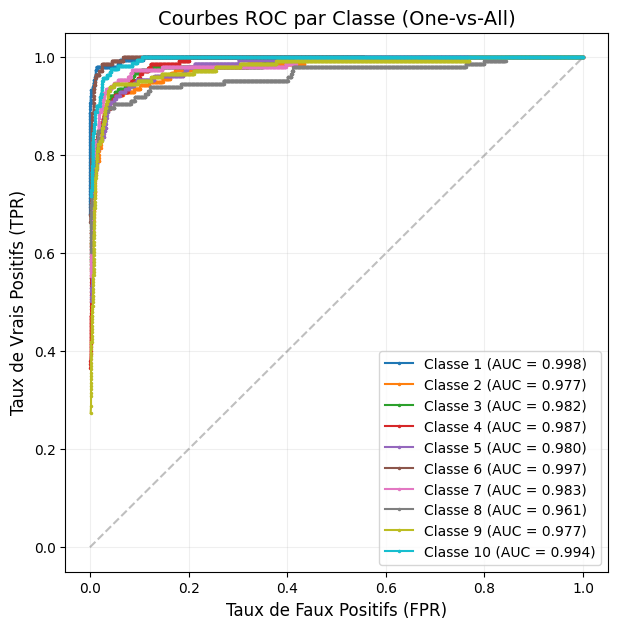

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def roc_curve_manual(y_true, y_scores, class_label):
    # Convertir en classification binaire : 1 si la classe correspond, 0 sinon
    y_true_binary = (y_true == class_label).astype(int)

    # Trier les seuils de classification par ordre décroissant
    thresholds = np.sort(np.unique(y_scores))[::-1]

    # Initialisation des listes
    tpr_list = []
    fpr_list = []

    # Nombre total de positifs et négatifs
    P = np.sum(y_true_binary == 1)
    N = np.sum(y_true_binary == 0)

    # Calcul du TPR et FPR à chaque seuil
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)  # Convertir en classes binaires

        TP = np.sum((y_pred == 1) & (y_true_binary == 1))
        FP = np.sum((y_pred == 1) & (y_true_binary == 0))
        TN = np.sum((y_pred == 0) & (y_true_binary == 0))
        FN = np.sum((y_pred == 0) & (y_true_binary == 1))

        TPR = TP / P if P != 0 else 0  # Sensibilité
        FPR = FP / N if N != 0 else 0  # Spécificité

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Calcul de l'AUC pour cette classe
    auc_score = roc_auc_score(y_true_binary, y_scores)

    return fpr_list, tpr_list, auc_score


# Obtenir les classes uniques
unique_classes = np.unique(y_test)

# Création de la figure
plt.figure(figsize=(7, 7), dpi=100)

# Générer une courbe ROC pour chaque classe
for class_label in unique_classes:
    y_test_binary = (y_test == class_label).astype(int)  # Transformer en binaire
    y_scores_class = model.predict_proba(X_test)[:, class_label - 1]  # Sélectionner la probabilité de la classe

    fpr, tpr, auc_score = roc_curve_manual(y_test, y_scores_class, class_label)

    # Tracer la courbe ROC pour cette classe
    plt.plot(fpr, tpr, marker='.', linestyle='-',  markersize=3,
             label=f"Classe {class_label} (AUC = {auc_score:.3f})")

# Ajouter la ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.5)

# Mise en forme du graphe
plt.xlabel("Taux de Faux Positifs (FPR)", fontsize=12)
plt.ylabel("Taux de Vrais Positifs (TPR)", fontsize=12)
plt.title("Courbes ROC par Classe (One-vs-All)", fontsize=14)
plt.legend(fontsize=10, loc="lower right")
plt.grid(alpha=0.2)
plt.show()


# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calculer toutes les distances avec les points d'entraînement
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Obtenir les indices des K plus proches voisins
        k_indices = np.argsort(distances)[:self.k]

        # Récupérer les étiquettes des voisins
        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        # Retourner la classe majoritaire
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Normalisation des données
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

# Division des données en entraînement et test
Xt, Xtt, Yt, Ytt = train_test_split(scaled_features, Y, test_size=0.30, random_state=42)

# Test de KNN avec différents K
for k in [1,2, 3,4, 5,6, 7,8, 9]:
    knn = KNN(k=k)
    knn.fit(Xt, Yt)
    Y_pred = knn.predict(Xtt)
    accuracy = accuracy_score(Ytt, Y_pred)
    print(f"Précision pour K={k}: {accuracy:.4f}")


Précision pour K=1: 0.8673
Précision pour K=2: 0.8673
Précision pour K=3: 0.8740
Précision pour K=4: 0.8793
Précision pour K=5: 0.8707
Précision pour K=6: 0.8760
Précision pour K=7: 0.8727
Précision pour K=8: 0.8753
Précision pour K=9: 0.8687


# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear')
# entrainement
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

2


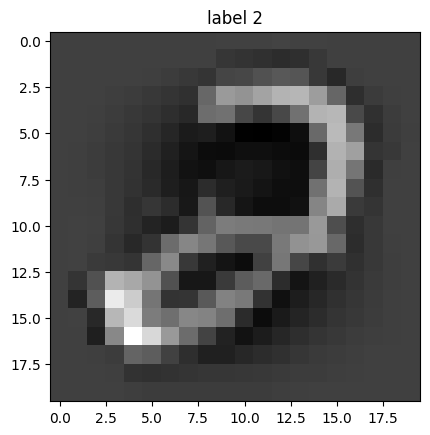

In [ ]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

2


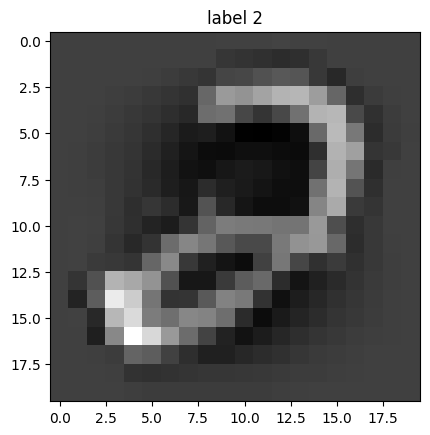

In [ ]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [ ]:
# Choisir un image de test
c=0

In [ ]:
model.predict([Xtt[c,:]])

array([8])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[0.03985391, 0.11523875, 0.1691533 , 0.03784617, 0.17129647,
        0.03986563, 0.03455799, 0.1782576 , 0.04197939, 0.17195078]])

Afficher l'image testée

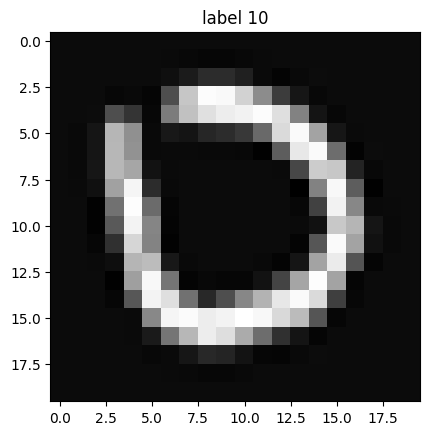

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Appliquer les métriques implementées pour voir le résultat et comparer les avec celles des librairies de python

# Matrice de confusion

In [ ]:
cm = confusion_matrix(y_test, y_pred)


# Les metriques

Accuracy: 0.8613
Precision: 0.8634
Recall: 0.8613
F1-score: 0.8617


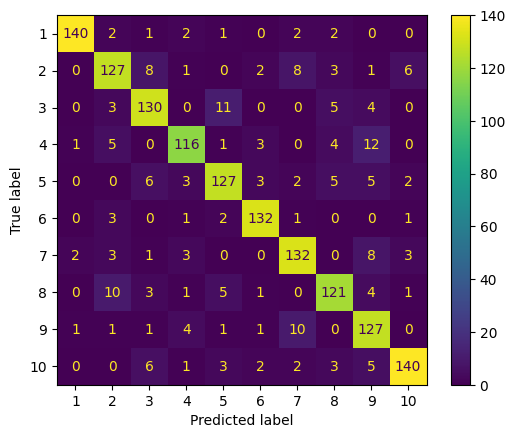

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


# Courbe ROC

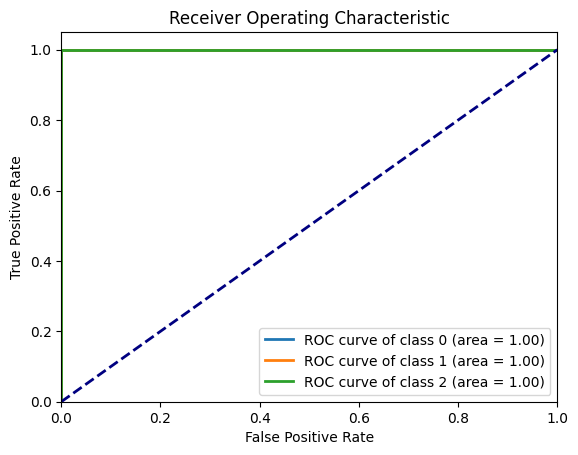

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN

In [ ]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xt, Yt)
    Y_pred = knn.predict(Xtt)
    accuracy = accuracy_score(Ytt, Y_pred)
    print(f"Accuracy for K={k}: {accuracy:.4f}")

Accuracy for K=1: 0.9243
Accuracy for K=2: 0.9023
Accuracy for K=3: 0.9163
Accuracy for K=4: 0.9154
Accuracy for K=5: 0.9163
Accuracy for K=6: 0.9169
Accuracy for K=7: 0.9151
Accuracy for K=8: 0.9120
Accuracy for K=9: 0.9089
Accuracy for K=10: 0.9037


# Refaire le processus sur un autre dataset de votre choix (exemple: iris...)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names  # Noms des classes
print( "la taille du target names ",len(iris.target_names))
print(class_names)
print("la taille du data ",len(iris.data))


la taille du target names  3
['setosa' 'versicolor' 'virginica']
la taille du data  150


🔹 Accuracy: 1.0000
🔹 Precision: 1.0000
🔹 Recall: 1.0000
🔹 F1-score: 1.0000


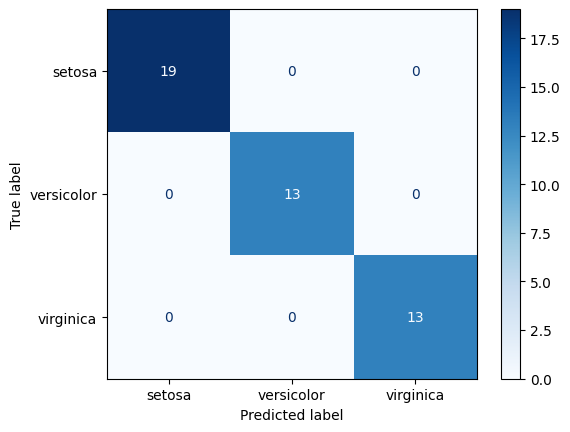

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1-score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.show()


# KNN

K=1 → Accuracy: 0.9778
K=2 → Accuracy: 0.9778
K=3 → Accuracy: 1.0000
K=4 → Accuracy: 0.9778
K=5 → Accuracy: 1.0000
K=6 → Accuracy: 1.0000
K=7 → Accuracy: 1.0000
K=8 → Accuracy: 1.0000
K=9 → Accuracy: 1.0000
K=10 → Accuracy: 1.0000

 Meilleur K = 3 avec Accuracy = 1.0000

Résultats finaux avec K=3
🔹 Accuracy: 1.0000
🔹 Precision: 1.0000
🔹 Recall: 1.0000
🔹 F1-score: 1.0000


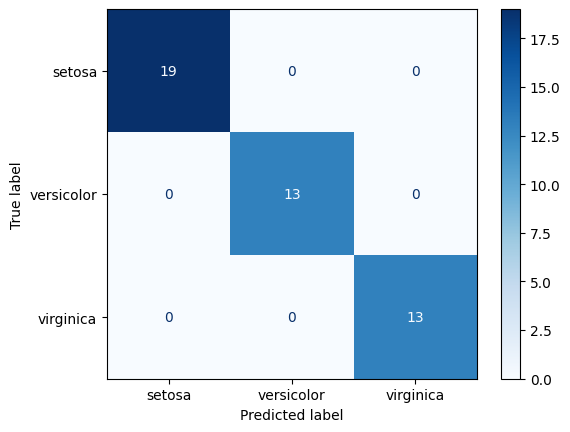

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


best_k = 0
best_accuracy = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} → Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"\n Meilleur K = {best_k} avec Accuracy = {best_accuracy:.4f}\n")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Résultats finaux avec K={best_k}")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.show()


# En utilisant MNIST



*   MLP Classifier


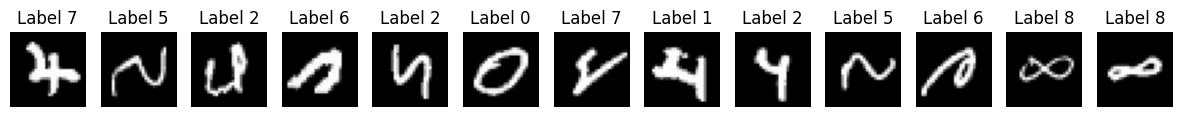

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


🔹 Accuracy MLP: 0.9744


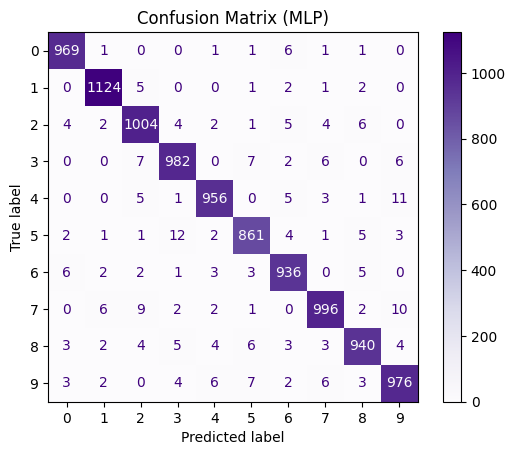

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 📌 Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 📌 Display some random images with transposition
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(0, X_train.shape[0] - 1)  # Random index
    a = np.transpose(X_train[c])  # Transpose the image (28x28)
    plt.subplot(1, 13, i + 1)
    plt.title(f'Label {y_train[c]}')
    plt.imshow(a, cmap='gray')
    plt.axis('off')
plt.show()

# 📌 Flatten the images (28x28 → 784 pixels)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 📌 Normalize pixel values (0-255 → 0-1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# 📌 Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

# 📌 Define & Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20, random_state=42)
mlp.fit(X_train_split, y_train_split)

# 📌 Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# 📌 Compute accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"🔹 Accuracy MLP: {accuracy:.4f}")

# 📌 Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap="Purples")
plt.title("Confusion Matrix (MLP)")
plt.show()


* KNN

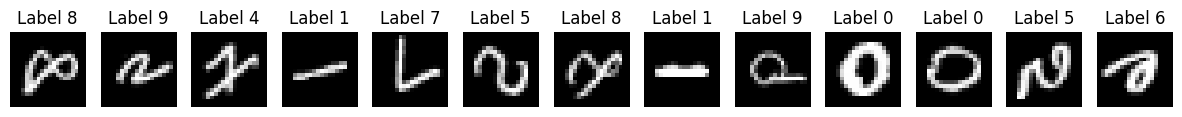

🔹 Accuracy KNN : 0.9422


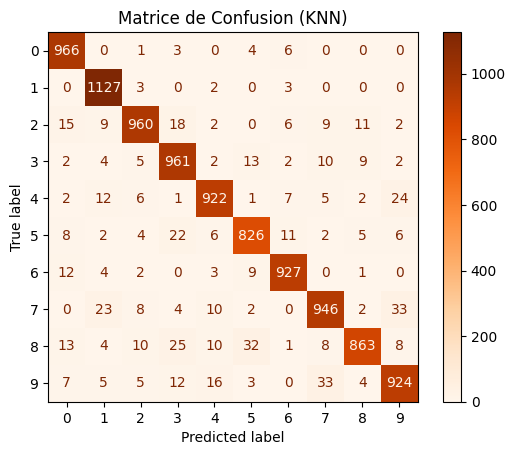

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from skimage.transform import resize # Import the resize function

# 📌 Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train_resized = np.array([resize(img, (20, 20), anti_aliasing=True) for img in X_train])
X_test_resized = np.array([resize(img, (20, 20), anti_aliasing=True) for img in X_test])

# 📌 Affichage de quelques images aléatoires avec transposée
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(0, X_train.shape[0] - 1)  # Index aléatoire
    a = np.transpose(X_train_resized[c])  # Transposition de l'image 28x28
    plt.subplot(1, 13, i + 1)
    plt.title(f'Label {y_train[c]}')
    plt.imshow(a, cmap='gray')
    plt.axis('off')
plt.show()

# 📌 Aplatir les images (28x28 → 784 pixels)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 📌 Normalisation des pixels (0-255 → 0-1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# 📌 Séparation train/test (juste pour s'assurer de la cohérence)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

# 📌 Modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_split, y_train_split)

# 📌 Prédictions
y_pred_knn = knn.predict(X_test_scaled)

# 📌 Affichage des métriques
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"🔹 Accuracy KNN : {accuracy:.4f}")

# 📌 Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Oranges")
plt.title("Matrice de Confusion (KNN)")
plt.show()
